NAME - SAMRIDDHI DAS


SEAT NO.- 202301040276

PRN NO.- 202301040276

# **Write a algorithm and program for Traveling salesman problem using Genetic Algorithm**

In [ ]:
# ***Travelling Salesman Problem***

#Imagine you are a travelling sales person
# u have a list of cities you need to visit
# And u need to figure out the shortest possible route that visits each city excatly ones and returns to the initial point

# ***Application***
# Delivery routes
# Dna Sequencing




# ***Genetic Algorithm***

#A Genetic Algorithm is a way to solve problems that works like natural evolution
#It begins with many random solutions, it checks which ones perform better
# Then it improves them gradually using Selection, Crossover, Mutation until a good soln is found


# ***Why we are using GA for TSP***

#TSP is a NP hard problem
# no. of possible route is too much, it grows too fast
# checking all possibilities is nearly impossible for big type of problems

# GA doesn't explore each and every possible option
#Instead it starts with random routes and evolve the best route together
#     Selection- Select the best two parents
#     crossover- cross over the parents to form new children
#     Mutation- makes small random changes in a soln, avoids getting stuck in bad soln
# It may not always give the best soln out there, but it gives nearly the best soln faster



# ***State Space Search***


# set of states (S) = collection of all possible ways of cities

#       Each state= a possible route (order of visiting all cities)
#       ex: if there are 4 cities then [A,B,C,D,A] or [A,D,C,B,A] etc

# ***Actions (A)***

# All possible operations we can perform to move from 1 state to another
# In TSP, we do
#               crossover: combine 2 routes to form a new one
#               mutation: swap or reorder cities

# ***Transition state(T)***

# when we apply an action to a current state, it gives us a new state (route)
#          Ex: Current route= [A,B,C,D,A]
#              Action: Mutation (swap B & D)= new route = [A,D,C,B,A]
#Moving from 1 route to another by applying genetic operations

# ***Start and Goal state***

# start state= randomly choosed
# goal state= route with minimal total distance


In [ ]:
'''Algorithm for GENETIC ALGORITHM'''

# Firstly use random routes to start the population
# Determine the total distance using the formula d = √[(x2​ - x1​)2 + (y2​ - y1​)2​] to assess each route's fitness
# Now based on the shortest distances, choose the best routes top 50 %
# crossover:
#     - Select two parent routes randomly
#     - Take a section of parent1 and copy it
#     - fill in the remaining cities from parent 2 in order
# mutation: To preserve diversity, there is a chance that two cities will be switched along the route
# Update the best solution by keeping track of the distance and shortest path
# For the specified number of generations, repeat Steps 2–6


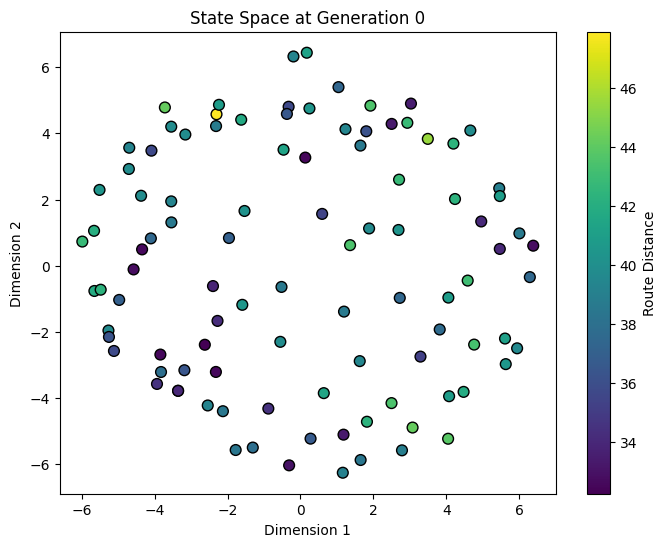

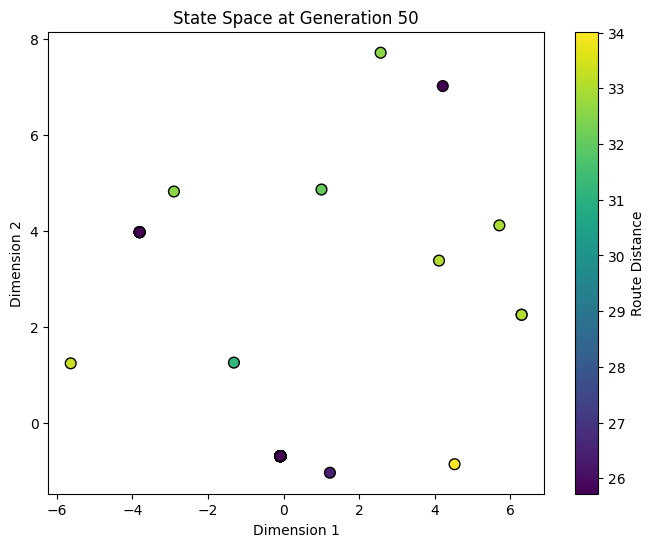

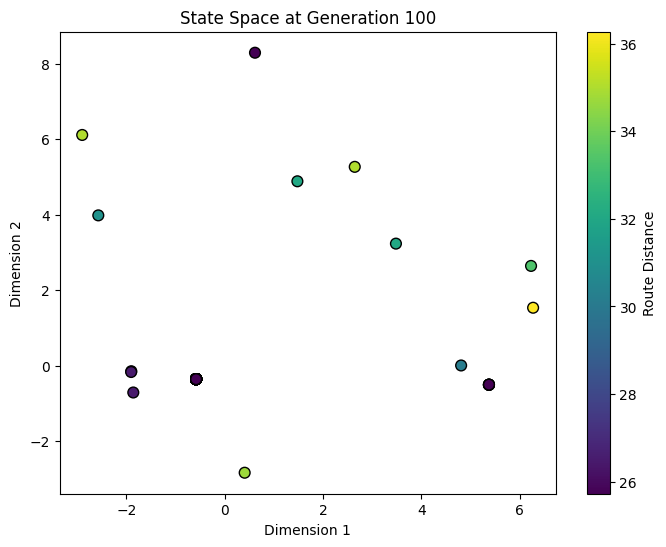

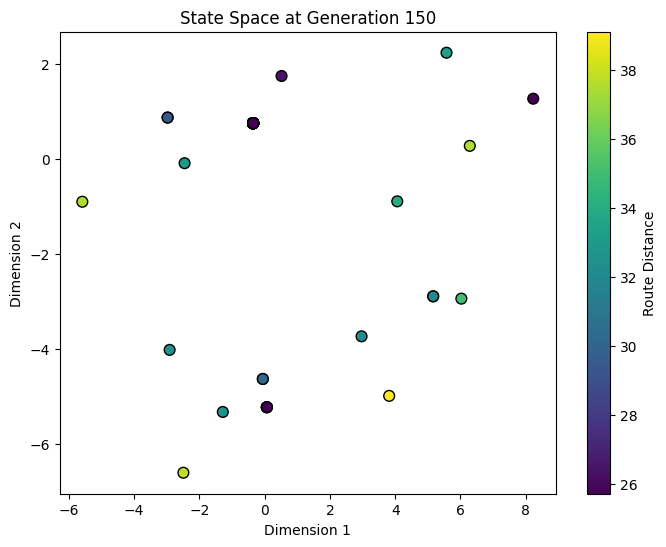

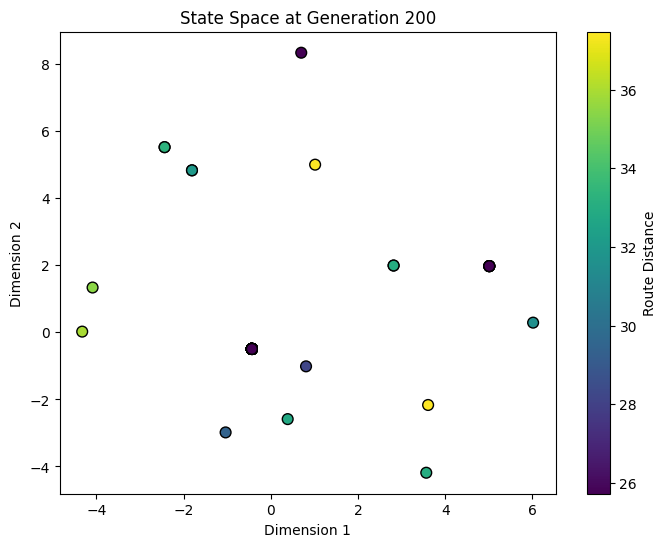

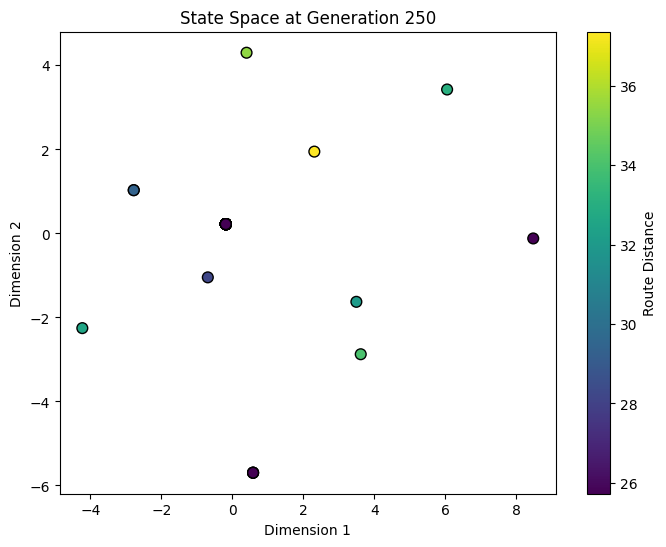

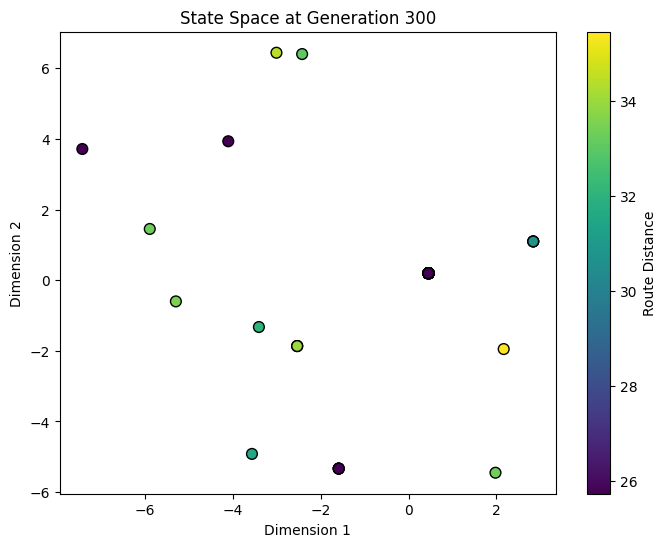

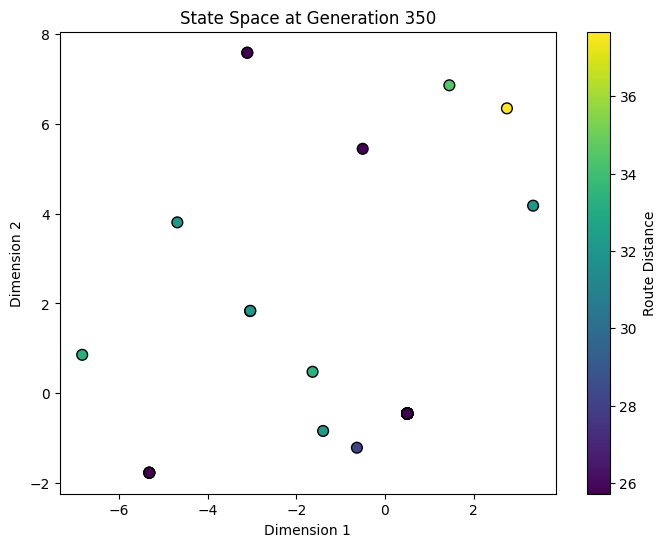

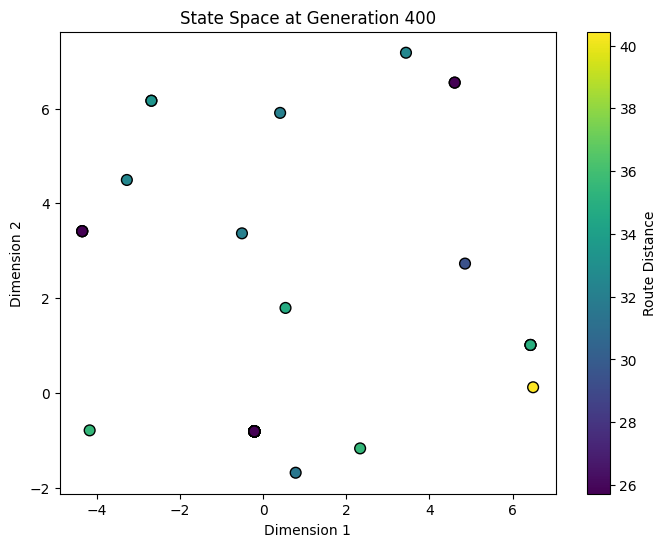

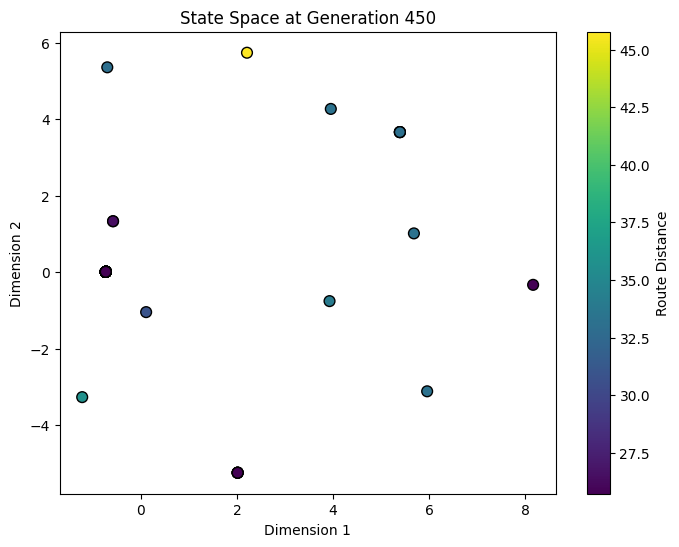

Best Route:  ['D', 'E', 'C', 'A', 'B', 'F', 'G']
Best Distance:  25.7232698968123


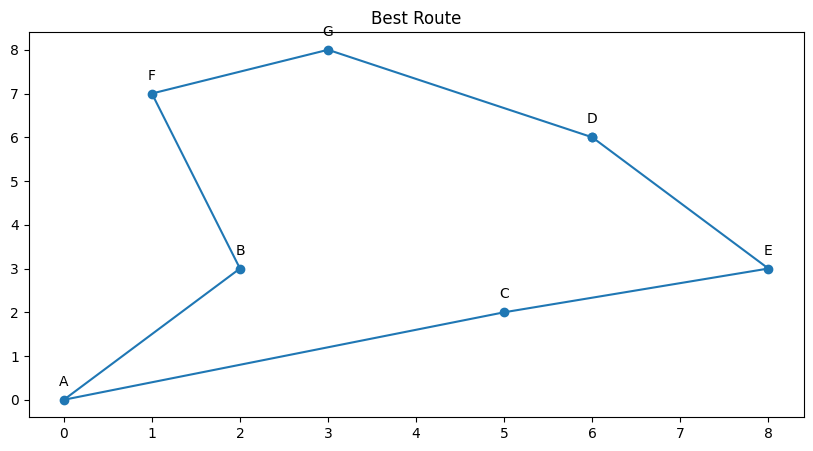

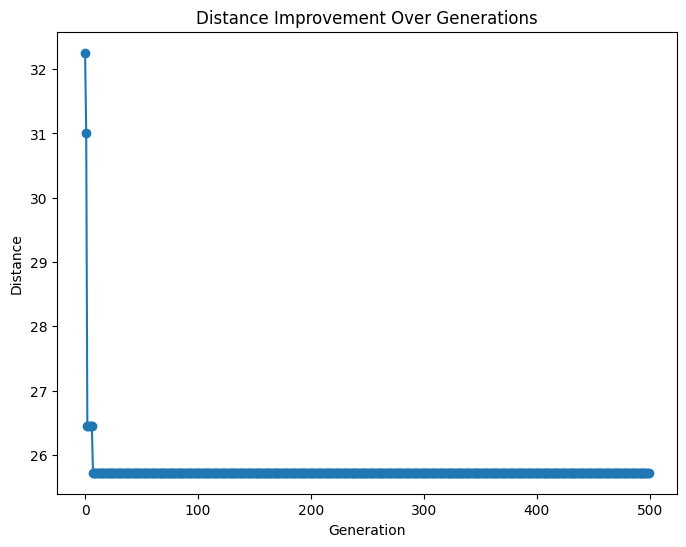

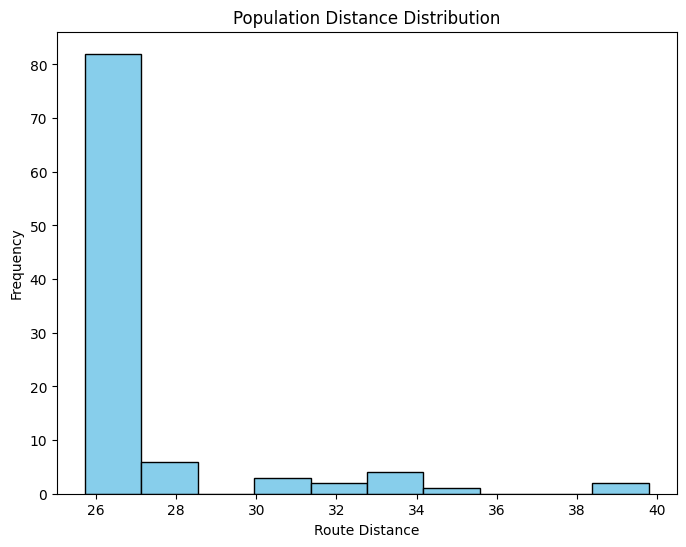

In [ ]:
import random                      # for getting random numbers
import numpy as np                 # for working with arrays
import matplotlib.pyplot as plt    # for making graphs
from sklearn.manifold import MDS


# Coordinates of the cities (x,y)
cities = {
    'A': (0, 0),
    'B': (2, 3),
    'C': (5, 2),
    'D': (6, 6),
    'E': (8, 3),
    'F': (1, 7),
    'G': (3, 8),
}

# for Calculating distance of a route
def total_distance(route):
    distance = 0                                             # start with distance 0
    for i in range(len(route)):                              # for going through all the cities in the route
        city1 = cities[route[i]]                             # current city coordinates
        city2 = cities[route[(i + 1) % len(route)]]          # next city
        distance += ((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2) ** 0.5  # return total distance of this route
    return distance                                                               # using the distance formula d = √[(x2​ - x1​)2 + (y2​ - y1​)2​]

# Generate first random route
def create_population(size, cities):
    population = []                                          # empty list is created for all routes
    for _ in range(size):                                    # size as no. of routes
        route = list(cities.keys())                          # route will have a list of all city names
        random.shuffle(route)                                # shuffle them randomly
        population.append(route)                             # add this route to population
    return population

# check distance for every route
def evaluate_population(population):
    return [total_distance(route) for route in population]   # list of distances

# Selection: choose the best routes
def select(population, fitnesses, num_best):
    best_indices = np.argsort(fitnesses)[:num_best]          # sort by smallest distance
    return [population[i] for i in best_indices]             # returns the best route

# Crossover: mix two routes
def crossover(route1, route2):
    start, end = sorted(random.sample(range(len(route1)), 2))      # choose 2 random positions in the route which will generate random cut points
    child = [None] * len(route1)                                   # make an empty child  with same len as parents
    child[start:end] = route1[start:end]                           # copy the part of parent1 btw start and end into the child
    pointer = 0                                                    # used to find empty slots in the child
    for city in route2:                                            # goes through each city in parent2
        if city not in child:                                      # if city is not already copied form parent1
            while child[pointer] is not None:                      # move pointer forward untill we find an empty slot
                pointer += 1
            child[pointer] = city                                  # move the city from parent2 to empty slot
    return child                                                   # this child is now a mix of parent1 and parent2

# Mutation: swap two cities
def mutate(route, mutation_rate):
    for i in range(len(route)):                                    # goes through each city in the route
        if random.random() < mutation_rate:                        # gives a random no. btw o and 1 and the mutation rate is give while calling the GA
                                                                   # it means that even with a small probability do a mutation
            j = random.randint(0, len(route) - 1)                  # picks a random position j in the route (another city)
            route[i], route[j] = route[j], route[i]                # swap 2 cities position in route
    return route

# Genetic Algorithm
def genetic_algorithm(cities, population_size=100, generations=500, mutation_rate=0.01):
    population = create_population(population_size, cities)        # Creating the 1st random population of routes
    best_route = None                                              # Track the best route found until now
    best_distance = float("inf")                                   # start with infinity
    progress = []                                                  # track best distance of each generation

    for generation in range(generations):                          # we'll repeat for the given no. of generation
        fitnesses = evaluate_population(population)                # calculates dist. of all routes in the population
        best_gen_route = population[np.argmin(fitnesses)]          # find the best route of this generation
        best_gen_distance = min(fitnesses)                         # argmin gives the index of the smallest distance

        if best_gen_distance < best_distance:                      # if this generation is best than the othr best
            best_route = best_gen_route                            # then we'll update
            best_distance = best_gen_distance

        progress.append(best_gen_distance)                         # save the best dist. of this generation
                                                                  # for tracking the progress
        new_population = select(population, fitnesses, population_size // 2)    # we'll be selecting top 50% of routes of this generation

        if generation % 50 == 0:  # show snapshot every 50 generations
            plot_state_space(population, generation)
                                                                        # consider it as the survivors for the next generation
        while len(new_population) < population_size:               # keep making children until population is back to full size
            parent1, parent2 = random.sample(new_population, 2)    # picking 2 random parents from survivors
            child = crossover(parent1, parent2)                    # create child by mixing parents
            child = mutate(child, mutation_rate)                   # randomly we mutate the child by swapping
            new_population.append(child)                           # adding child to the new population

        population = new_population                                # replace old with new population

    return best_route, best_distance, progress, population        # returns the final result

# Plotting graphs
def plot_route(route):
    route_coords = [cities[city] for city in route]               # storing the city coordinates
    route_coords.append(route_coords[0])                          # return to start city
    x, y = zip(*route_coords)                                     # split into x & y  (unzips the list of pairs into 2 seperate lists
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o')
    plt.title('Best Route')

    for city, coord in cities.items():                           # label city names
        plt.annotate(city, coord, textcoords="offset points", xytext=(0, 10), ha='center')

    plt.show()

def plot_progress(progress):                                    # it plots progress over generation
    plt.figure(figsize=(8, 6))
    plt.plot(progress, marker='o')
    plt.title("Distance Improvement Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Distance")
    plt.show()

def plot_distance_distribution(population):
    """Plot histogram of route distances in the current population"""
    distances = [total_distance(route) for route in population]   # all route distances
    plt.figure(figsize=(8, 6))
    plt.hist(distances, bins=10, color='skyblue', edgecolor='black')
    plt.title("Population Distance Distribution")
    plt.xlabel("Route Distance")
    plt.ylabel("Frequency")
    plt.show()

def plot_state_space(population, generation):
    """Visualize state space (routes) in 2D using MDS-MultiDimentional scaling"""
    city_list = list(cities.keys())
    route_vectors = [[city_list.index(city) for city in route] for route in population]  # we'll Convert each route into numbers (indexes of cities)
    mds = MDS(n_components=2, dissimilarity="euclidean", random_state=42)                # MDS (Multi-Dimensional Scaling) is used to reduce route data into 2D points
    coords = mds.fit_transform(route_vectors)
    distances = [total_distance(route) for route in population]                          # we'll calculate the total distance for each route in the population
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(coords[:, 0], coords[:, 1], c=distances, cmap="viridis", s=60, edgecolor="k")
    plt.colorbar(scatter, label="Route Distance")
    plt.title(f"State Space at Generation {generation}")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()


# for running the GA
best_route, best_distance, progress, population = genetic_algorithm(cities)

print("Best Route: ", best_route)
print("Best Distance: ", best_distance)

# for seeing the graphs
plot_route(best_route)
plot_progress(progress)
plot_distance_distribution(population)


In [ ]:
# 1st Graph shows the path that a salesman should take
# inorder to travel all the cities with min distance

In [ ]:
# 2nd graph shows how Genetic algo. improves over generations
# line going down shows that the GA is getting a shorter paths to travel

In [ ]:
# 3rd graph shows frequency means how many routes have that distance
# if the bar is taller at shorter distance then many good routes exist
# if the bar is taller at long distance then it has many bad routes